In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [38]:
#log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/15-35-05_117/log_output.log'
#log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/16-03-47_195/log_output.log'
#log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/09-56-56_7/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-25-12_57/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-29-17_145/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-35-52_60/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-42-00_14/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-51-48_52/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/10-58-18_79/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/13-42-57_199/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/13-44-00_40/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/10-58-18_79/log_output.log'
## mixed augms
## we are interested in the bottoms too
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-27-46_166/log_output.log' # keep bottom 100%
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-30-59_42/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-33-32_254/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-35-52_231/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-45-11_191/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-27/19-21-21_41/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-27/19-26-43_204/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-27/19-30-52_79/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-27/19-40-41_243/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-27/19-44-22_14/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-27/19-50-31_30/log_output.log'


In [39]:
data = pd.read_csv(log_dir, delimiter = ",", header = None, skiprows=9)
data.columns=['cutout', 'nb_vx', 'nb_vx_after', 'nb_vx_without_bottoms', 'nb_vx_after_without_bottoms']
print(data)
print(data.head())

                            cutout  nb_vx  nb_vx_after  nb_vx_without_bottoms  \
0     INFO:augmentations.py: False    982          610                    746   
1      INFO:augmentations.py: True   1074          586                    827   
2     INFO:augmentations.py: False   1039          682                    777   
3     INFO:augmentations.py: False   1036          399                    831   
4      INFO:augmentations.py: True   1203          844                   1038   
...                            ...    ...          ...                    ...   
9667  INFO:augmentations.py: False   1031          575                    874   
9668   INFO:augmentations.py: True    861          686                    628   
9669   INFO:augmentations.py: True   1218          927                   1045   
9670  INFO:augmentations.py: False   1232          808                   1048   
9671   INFO:augmentations.py: True   1144          924                    987   

      nb_vx_after_without_b

In [40]:
l = data['cutout'].tolist()
data['cutout'] = [elem[-5:] for elem in l]

In [41]:
# for cutout
data_cutout = data.loc[data['cutout']==' True']
np.mean(data_cutout['nb_vx']), np.mean(data_cutout['nb_vx_without_bottoms']), np.mean(data_cutout['nb_vx_after_without_bottoms'])

(1131.089983374896, 952.4185369908562, 659.4339152119701)

In [42]:
# for cutin
data_cutin = data.loc[data['cutout']=='False']
np.mean(data_cutin['nb_vx']), np.mean(data_cutin['nb_vx_without_bottoms']), np.mean(data_cutin['nb_vx_after_without_bottoms'])

(1129.737037037037, 951.1037037037037, 516.6775720164609)

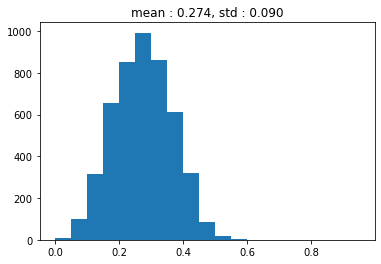

In [43]:
## plot the distributions of the proportion of non 30 vx removed
# cutout
l_before = data_cutout['nb_vx'].tolist()
l_after = data_cutout['nb_vx_after'].tolist()
removed_cutout = [(before - after) / before for before, after in zip(l_before, l_after)]
plt.hist(removed_cutout, bins=np.arange(0,1,0.05))
plt.title(f"mean : {np.mean(removed_cutout):.3f}, std : {np.std(removed_cutout):.3f}")
plt.show()

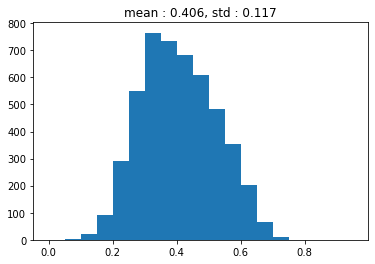

In [44]:
# cutin
l_before = data_cutin['nb_vx'].tolist()
l_after = data_cutin['nb_vx_after'].tolist()
removed_cutin = [(before - after) / before for before, after in zip(l_before, l_after)]
plt.hist(removed_cutin, bins=np.arange(0,1,0.05))
plt.title(f"mean : {np.mean(removed_cutin):.3f}, std : {np.std(removed_cutin):.3f}")
plt.show()